**4. Mixed-Model ANOVA**
>  Mixed-model ANOVA is a statistical method used to analyza data that involve both between-subjects factors and within-subject factors. It is like two-way ANOVA with repeated measurments.
> |  |  |  |
> |--|--|--|
> | Between subject | One-Way or Two-Way ANOVA |
> | Within subject  | Repeated Measures ANOVA |
> 
> |  |  |  |
> |--|--|--|
> | $H_0$ | $μ_1 = μ_2 =... = μ_n$    | → There are no difference between means of the groups of the within subject factor. <br> → There are no difference between means of the groups of the betwwen subject factor.. <br> → One factor has no influence on the other factor. (No difference on interactions) |
> | $H_1$ | $∃i,j \ \ such\ that \ \ i ≠ j\ and\ μ_i ≠ μ_j$ | → At least one group with a different mean within subject factor. <br>→ At least one group with a different mean between subject factor. <br> → One factor has influence on the other factor. (At least one interaction group is different). |
> 
> **ASSUMTIONS**
> >  → Dependent variables should be approximately normally distributed within the groups. (Normality) <br>
> > > *Important when sample size is small. When sample size is large, ANOVA is somewhat robust to violations of normality.*
> > 
> >  → The variances in each (within and between subjects) group should be equal. (Homogeneity of variances) <br>
> >  → For the within subjects factors the variances of differences between all combinations of the different groups should be equal. (Homogeneity of covariances)
> > > *This assumption can be check with **Mauchly's Test of Spericity**. If the assumption is violated, adjustments, to degrees of freedom, such as **Greenhouse–Geisser correction** or **Huynh–Feldt correction** can be use.*
> > 
> >  → The observations are independent od each other.<br>
> >  → No significant outlier
> > > *Outliers can have a disproportionate impact on ANOVA, potentially lead to misleading results.*

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

In [1]:
import pandas as pd
import pingouin as pg

import seaborn as sns
import matplotlib.pyplot as plt

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Functions to Use </p>

In [2]:
α = alpha = 0.05

def decision(p, alpha=0.05):
    'acceptance or rejection of the null hypothesis'
    if p < alpha: return 'H0 rejected.'
    else: return 'H0 cannot be rejected.'

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; MIXED-MODEL ANOVA </p>

**Subject :** Comparison of stores' sales by quarters and by product type <br>
**Data :** 9_store_sales_data.csv

|  |  |
|--|--|
| $H_0$ | → There is no significant difference in average sales counts across product types, quarters, or their interaction.|
| $H_1$ | → There is a significant difference in average sales counts for at least one product type, quarter, or their interaction.|

In [3]:
data = pd.read_csv('data/09_store_sales_data.csv')
data.head()
# data.info()

,Store ID,Product Type,Q1,Q2,Q3,Q4
0,1,PC,584,473,809,299
1,2,PC,932,209,435,921
2,3,PC,597,463,990,526
3,4,PC,210,579,535,146
4,5,PC,543,541,495,827


**1. Data Preparation**

In [4]:
df = data.melt(id_vars=['Store ID', 'Product Type'], value_vars=['Q1', 'Q2', 'Q3', 'Q4'],  var_name='Quarter', value_name='Sales')
df.sample(5)
# data.info()

,Store ID,Product Type,Quarter,Sales
231,232,Tablet,Q1,534
1742,543,Phone,Q3,902
1501,302,Tablet,Q3,442
1286,87,PC,Q3,367
13,14,PC,Q1,979


**2. Normality Test**

In [5]:
normality = pg.normality(data=df, dv='Sales', group='Product Type', method='shapiro', alpha=alpha)
display(normality)

normality = pg.normality(data=df, dv='Sales', group='Quarter')
display(normality)

df['Interaction'] = df['Product Type'] + ' & ' + df['Quarter']
normality = pg.normality(data=df, dv='Sales', group='Interaction')
display(normality)

,W,pval,normal
Product Type,,,
PC,0.955801,8.816412e-15,False
Tablet,0.945549,1.435655e-16,False
Phone,0.957604,1.945038e-14,False


,W,pval,normal
Quarter,,,
Q1,0.950013,2.269466e-13,False
Q2,0.958900,6.709023e-12,False
Q3,0.952360,5.322801e-13,False
Q4,0.949883,2.166457e-13,False


,W,pval,normal
Interaction,,,
PC & Q1,0.946927,9.645625e-07,False
Tablet & Q1,0.939463,2.058598e-07,False
Phone & Q1,0.956243,7.922045e-06,False
PC & Q2,0.960876,2.462830e-05,False
Tablet & Q2,0.944838,6.187274e-07,False
Phone & Q2,0.963833,5.260069e-05,False
PC & Q3,0.962455,3.680780e-05,False
Tablet & Q3,0.935510,9.493488e-08,False
Phone & Q3,0.950272,2.004645e-06,False


In [6]:
df['Interaction'].value_counts().to_frame().T

Interaction,PC & Q1,Tablet & Q1,Phone & Q1,PC & Q2,Tablet & Q2,Phone & Q2,PC & Q3,Tablet & Q3,Phone & Q3,PC & Q4,Tablet & Q4,Phone & Q4
count,200,200,200,200,200,200,200,200,200,200,200,200


**3. Homogeneity Test**

In [7]:
homogeneity_p = pg.homoscedasticity(data=df, dv='Sales', group='Product Type', method='bartlett')
homogeneity_q = pg.homoscedasticity(data=df, dv='Sales', group='Quarter', method='bartlett')
homogeneity_i = pg.homoscedasticity(data=df, dv='Sales', group='Interaction', method='bartlett')

homogeneity = pd.concat([homogeneity_p, homogeneity_q, homogeneity_i])
homogeneity['Factor'] = ['Product Type', 'Quarter', 'Interaction']
display(homogeneity)

,T,pval,equal_var,Factor
bartlett,2.843653,0.241273,True,Product Type
bartlett,0.705759,0.871849,True,Quarter
bartlett,5.202135,0.920983,True,Interaction


**4. Spericity Test** - Mauchly's Test of Spericity

In [8]:
spericity = pg.sphericity(df, dv='Sales', subject='Store ID', within='Quarter')

# display(spericity)
print(f'p: {spericity.pval:.4f}')
print('Decision:', decision(spericity.pval, α))

p: 0.6939
Decision: H0 cannot be rejected.


**5. Check for Outliers**

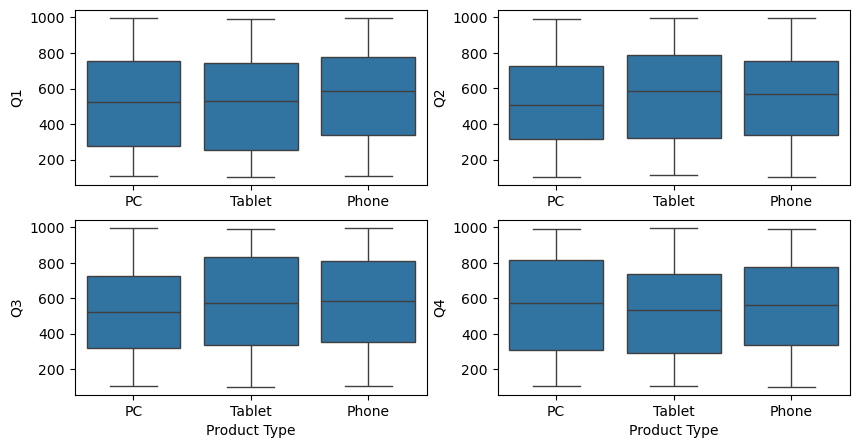

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))

sns.boxplot(data, y='Q1', x='Product Type', ax=axs[0,0])
sns.boxplot(data, y='Q2', x='Product Type', ax=axs[0,1])
sns.boxplot(data, y='Q3', x='Product Type', ax=axs[1,0])
sns.boxplot(data, y='Q4', x='Product Type', ax=axs[1,1])
axs[0,0].set_xlabel(None)
axs[0,1].set_xlabel(None)
plt.show()

**6. Test Implementation** - Mixed-Model ANOVA

In [10]:
test = pg.mixed_anova(data=df, dv='Sales', within='Quarter', subject='Store ID', between='Product Type')
test['Decision'] = test['p-unc'].map(lambda x: True if x>alpha else False)
display(test)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps,Decision
0,Product Type,227928.563333,2,597,113964.281667,1.719660,0.180013,0.005728,NaN,True
1,Quarter,206077.023333,3,1791,68692.341111,1.006471,0.388902,0.001683,0.996648,True
2,Interaction,503360.316667,6,1791,83893.386111,1.229194,0.288131,0.004101,NaN,True


**7. Test Implementation** - Post-hoc - **UNNECESSARY IN THIS CASE**

In [11]:
# test = pg.pairwise_tests(df, dv='Sales', subject='Store ID', within='Quarter', between='Product Type', padjust='bonf')
# test['Decision'] = test['p-unc'].map(lambda x: True if x>alpha else False)
# display(test)

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>